### import dataset from github

In [1]:
import pandas as pd              #import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv') #import data

In [3]:
df.head() #shown first 5 line of dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape #dataset include 12 columne and 1600 rows

(1599, 12)

In [5]:
df.dtypes #different datatypes most of tha data in float 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.info() #there is no null values present in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Statistics

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Key Observation:Free and total sulfur dioxide having high data spreding.
  1.The mean is more than median in allmost half of the columns.(skewnesss is more)
    2.There is a large difference in 75% percentile and max in residual sugar free sulfar dioxide total sulfar dioxide.
    obove observation suggest that there are extrame outliers present in these three columns.

### Exploring Data Variable:
    Target variable is discrete and categorical in nature
    Quality scale score ranges from 3 to 8 where 3 is low & 8 is high Quality

In [9]:
df.quality.unique()  

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
df.quality.value_counts()    
#Quality has most values concentrated in the categories of 5 to 7 few observations present in 8 and 3


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Data Visulatization 

<AxesSubplot:>

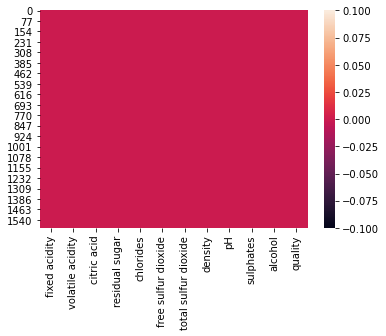

In [11]:
#To check missing values
sns.heatmap(df.isnull())

### Data set have no missing values

### To check correlation :

In [12]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

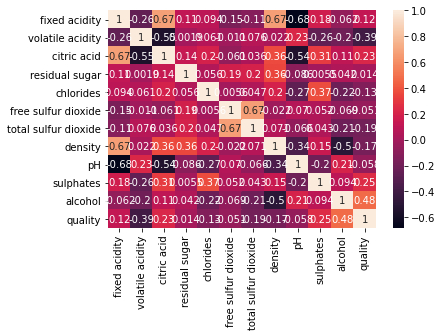

In [13]:
sns.heatmap(dfcor,annot=True)

### observation:
    dark shades are highly correlated
    light shades are lightly correlated
    volatile acidity is having high negative correlation
    free sulfur dioxide and total sulfur dioxide having high positive correlation
    Quality is highly correlated with alcohol

### Plotting Outlier

In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

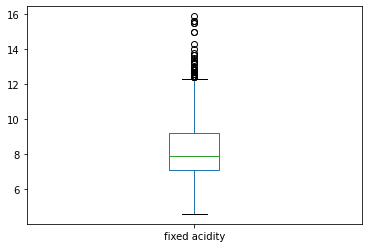

In [15]:
# univariate analysis
df['fixed acidity'].plot.box()

### high outlier present in fixed acidity 

<AxesSubplot:>

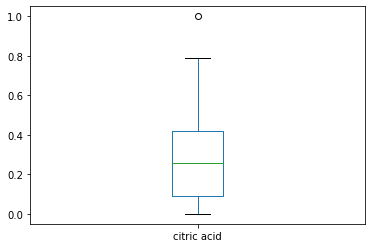

In [16]:
df['citric acid'].plot.box() #very less outlier precent as compare to sulphates

<AxesSubplot:>

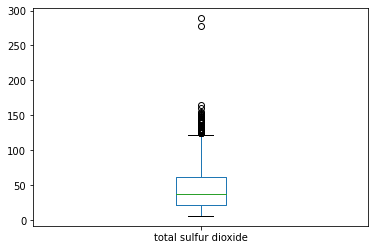

In [17]:
df['total sulfur dioxide'].plot.box() # less amout of outlier present

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

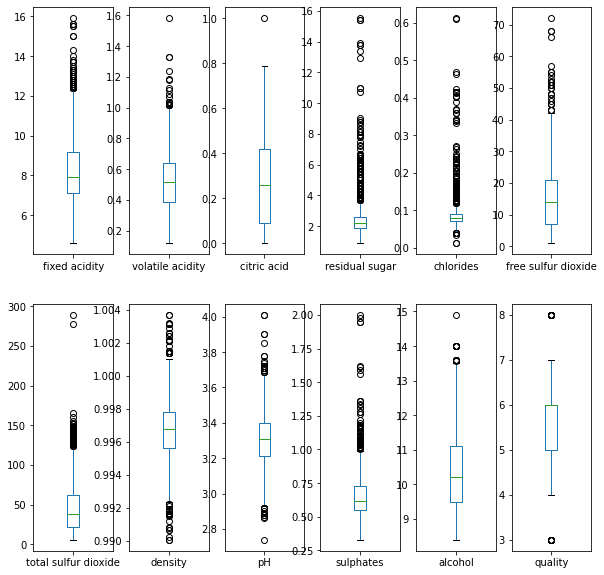

In [18]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10)) #shopwn all columns outliear

### Density is having more outler as well as pH,sulphates,totalsulfur dioxide,residual sugar,chlorides,free sulfur dioxide having outler


### To check Distribution of Skewness

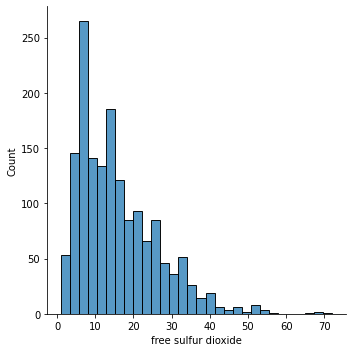

In [19]:
sns.displot(df['free sulfur dioxide']) #Total sulfur dioxide having much skewness

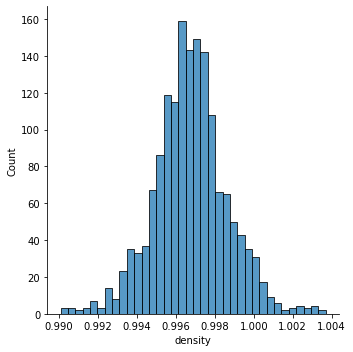

In [20]:
sns.displot(df['density']) # Density is not having that much of skwness

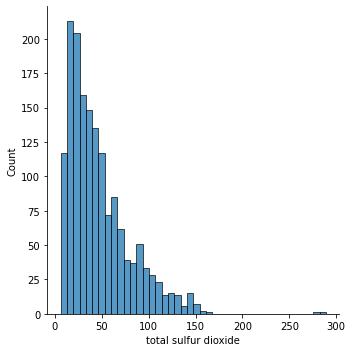

In [21]:
sns.displot(df['total sulfur dioxide']) #total sulfur dioxide having skewness

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

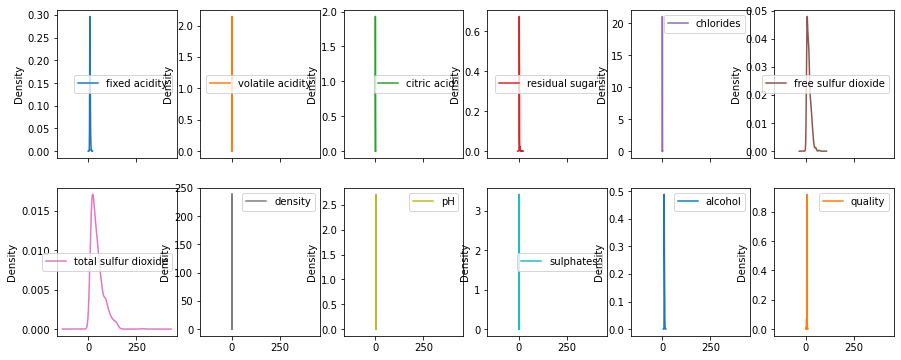

In [22]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6)) #all columns shown skewness of data sets

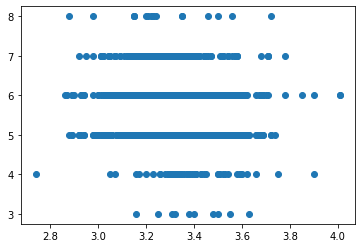

In [23]:
# Bivariat Analysis
plt.scatter(df['pH'],df['quality']) # PH parameters most of the density is 3.0to 3.8 and quality is varies from 4 to 8 comparision between target and input 

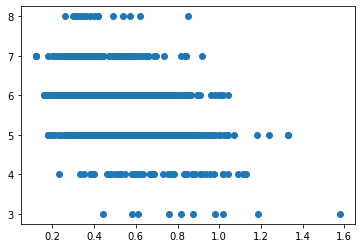

In [24]:
plt.scatter(df['volatile acidity'],df['quality'])# volatile acidity having high density from 0.4 to 1.4 with respect to quality 

In [25]:
# Removing the Missing values we dont have missing values
# Drop the negatively correlated coluumns
# Remove the Outliers

In [26]:
df.drop('volatile acidity',axis=1,inplace=True) #volatile acidity is having negative correlation so drop the column
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
df.shape   # Removing volatile acidity columns

(1599, 11)

In [28]:
#Removing Outliers
from scipy.stats import zscore #zscore is used to removeing outliers from dataset
z=np.abs(zscore(df))
z

array([[0.52835961, 1.39147228, 0.45321841, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.39147228, 0.04341614, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.18607043, 0.16942723, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.72391627, 0.16942723, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.77526673, 0.38227061, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.02199944, 0.75289408, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [29]:
threshold=3
print(np.where(z>3)) # Removing outliers 3 dimentional and 0 dimentional removing .
df_new=df[(z<3).all(axis=1)]

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
        169,  181,  226,  226,  240,  243,  244,  258,  258,  274,  281,
        291,  324,  325,  339,  340,  347,  354,  374,  381,  391,  396,
        396,  400,  400,  442,  442,  451,  459,  467,  480,  480,  494,
        515,  517,  544,  554,  554,  555,  555,  557,  557,  568,  584,
        588,  591,  595,  608,  614,  636,  639,  649,  649,  651,  652,
        652,  652,  672,  684,  690,  692,  692,  695,  723,  730,  754,
        776,  777,  795,  821,  832,  836,  837,  889,  899,  911,  917,
        923,  925,  926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074,
       1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186,
       1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269, 1270, 1270, 1288,
       1289, 1295, 1296, 1299, 1300, 1316, 1319, 1

In [30]:
z[13][8]

5.32210116796055

In [31]:
z[1589][2]

3.732701384742145

In [32]:
df_new["quality"].replace([3,4,5,6],'0',inplace=True)
df_new["quality"].replace([7,8],'1',inplace=True)

C:\Users\soham\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [33]:
print(df_new.shape) # After removing outliers and correlation data size .141 rows are deleted as an outliers
print(df.shape)

(1458, 11)
(1599, 11)


In [34]:
loss_percent=(1599-1458)/1599*100
loss_percent

8.818011257035648

checking wether how much outliers are still there.if the outliers there help in the model or not.


In [35]:
x=df_new.iloc[:,0:10] #know we get input as x from dataset 
y=df_new.iloc[:,-1]

Trasforming data to remove skewness:    

In [36]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\soham\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [37]:
x

array([[-0.46531304, -1.52179499, -0.60699518, ...,  1.35472616,
        -0.58214208, -1.12084644],
       [-0.16806727, -1.52179499,  0.65224299, ..., -0.82077427,
         0.45668225, -0.53203934],
       [-0.16806727, -1.24125263,  0.21101302, ..., -0.38617329,
         0.22572251, -0.53203934],
       ...,
       [-1.44922717, -0.66001353,  0.21101302, ...,  0.74054165,
         0.93435865,  0.74129668],
       [-1.88412706, -0.72146733, -0.37111918, ...,  1.7567213 ,
         0.67127261, -0.03633508],
       [-1.77077959,  1.07540664,  1.5464447 , ...,  0.5327437 ,
         0.30462192,  0.74129668]])

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.46531304, -1.52179499, -0.60699518, ...,  1.35472616,
        -0.58214208, -1.12084644],
       [-0.16806727, -1.52179499,  0.65224299, ..., -0.82077427,
         0.45668225, -0.53203934],
       [-0.16806727, -1.24125263,  0.21101302, ..., -0.38617329,
         0.22572251, -0.53203934],
       ...,
       [-1.44922717, -0.66001353,  0.21101302, ...,  0.74054165,
         0.93435865,  0.74129668],
       [-1.88412706, -0.72146733, -0.37111918, ...,  1.7567213 ,
         0.67127261, -0.03633508],
       [-1.77077959,  1.07540664,  1.5464447 , ...,  0.5327437 ,
         0.30462192,  0.74129668]])

### Since the outcome has two variable we will use Binary Classification Model.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [40]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model perform very well")
        print("At random_state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100)

At random state 31 The model perform very well
At random_state:- 31
Training r2_score is :- 88.42195540308748
Testing r2_score is :- 88.35616438356165
At random state 194 The model perform very well
At random_state:- 194
Training r2_score is :- 89.02229845626071
Testing r2_score is :- 89.04109589041096
At random state 280 The model perform very well
At random_state:- 280
Training r2_score is :- 88.42195540308748
Testing r2_score is :- 88.35616438356165
At random state 315 The model perform very well
At random_state:- 315
Training r2_score is :- 88.67924528301887
Testing r2_score is :- 88.6986301369863
At random state 391 The model perform very well
At random_state:- 391
Training r2_score is :- 87.99313893653516
Testing r2_score is :- 88.01369863013699
At random state 474 The model perform very well
At random_state:- 474
Training r2_score is :- 88.67924528301887
Testing r2_score is :- 88.6986301369863
At random state 553 The model perform very well
At random_state:- 553
Training r2_scor

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=194)


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       256
           1       0.11      0.06      0.07        36

    accuracy                           0.83       292
   macro avg       0.49      0.50      0.49       292
weighted avg       0.78      0.83      0.80       292



### Cross Validation Score for Logistic Regression

In [43]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv:-',j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is :- 85.87105624142661
accuracy_score is :- 88.01369863013699


At cv:- 3
Cross validation score is :- 87.65432098765432
accuracy_score is :- 88.01369863013699


At cv:- 4
Cross validation score is :- 88.33866475989764
accuracy_score is :- 88.01369863013699


At cv:- 5
Cross validation score is :- 87.51706444475828
accuracy_score is :- 88.01369863013699


At cv:- 6
Cross validation score is :- 87.79149519890261
accuracy_score is :- 88.01369863013699


At cv:- 7
Cross validation score is :- 87.9981860245018
accuracy_score is :- 88.01369863013699


At cv:- 8
Cross validation score is :- 87.93010268420105
accuracy_score is :- 88.01369863013699


At cv:- 9
Cross validation score is :- 88.13443072702331
accuracy_score is :- 88.01369863013699




since cross validation score accuracy scotre are almost same.we are heading with a good approach.

In [44]:
lsscore_selected=cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is :",lsscore_selected,"\nThe accuracy score is :",lss)

The cv score is : 0.8833866475989763 
The accuracy score is : 0.8801369863013698


### AUC ROC Curve

### Model Saving

In [45]:
import pickle
filename='winequality.pkl'
pickle.dump(lr,open(filename,'wb'))

### Conclusion:

In [46]:
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,0,0
1,1,0
2,0,1
3,0,0
4,0,0
...,...,...
287,0,0
288,0,0
289,0,0
290,0,0


In [47]:
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [48]:
# Support Vector classifier
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8835616438356164
[[249   7]
 [ 27   9]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       256
           1       0.56      0.25      0.35        36

    accuracy                           0.88       292
   macro avg       0.73      0.61      0.64       292
weighted avg       0.86      0.88      0.86       292



In [49]:
# Decision Tree classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8595890410958904
[[235  21]
 [ 20  16]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       256
           1       0.43      0.44      0.44        36

    accuracy                           0.86       292
   macro avg       0.68      0.68      0.68       292
weighted avg       0.86      0.86      0.86       292



In [50]:
# KNeighbors classifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8767123287671232
[[242  14]
 [ 22  14]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       256
           1       0.50      0.39      0.44        36

    accuracy                           0.88       292
   macro avg       0.71      0.67      0.68       292
weighted avg       0.87      0.88      0.87       292



In [51]:
# Support vector Machine Kernal=ker,rbf,poly
def SVMkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [52]:
SVMkernel('rbf')

0.8835616438356164
[[249   7]
 [ 27   9]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       256
           1       0.56      0.25      0.35        36

    accuracy                           0.88       292
   macro avg       0.73      0.61      0.64       292
weighted avg       0.86      0.88      0.86       292



In [53]:
SVMkernel('poly')

0.8801369863013698
[[246  10]
 [ 25  11]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       256
           1       0.52      0.31      0.39        36

    accuracy                           0.88       292
   macro avg       0.72      0.63      0.66       292
weighted avg       0.86      0.88      0.87       292

